In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

xls = pd.ExcelFile('../data/precourse_22.xlsx')
df_experience = pd.read_excel(xls, 'Programmiererfahrung')
df_pretest = pd.read_excel(xls, "Pretest")
df_tasks = pd.read_excel(xls, 'Übungsaufgaben')
df_broca = pd.read_excel(xls, "BROCAtreat")
df_posttest = pd.read_excel(xls, "Posttest-Ahadi")
df_posttest_programming = pd.read_excel(xls, "Posttest-Programmieraufgabe")

Create Lists of different UIDs

In [2]:
broca_uid = df_broca['UID'].to_list()
all_uid = df_pretest['UID'].to_list()
control_uid = list(set(all_uid) - set(broca_uid))
control_uid.sort()
broca_uid.sort()

Calculate Points for Pretest and Posttest

In [3]:
pretest_all = df_pretest["Insgesamt"].dropna().to_list()
posttest_all = df_posttest["Insgesamt"].dropna().to_list()

In [4]:
broca_pretest = df_pretest[df_pretest.UID.isin(broca_uid)]
control_pretest = df_pretest[df_pretest.UID.isin(control_uid)]

broca_pretest = broca_pretest["Insgesamt"].dropna().to_list()
control_pretest = control_pretest["Insgesamt"].dropna().to_list()

In [5]:
broca_posttest = df_posttest[df_posttest.UID.isin(broca_uid)]
control_posttest = df_posttest[df_posttest.UID.isin(control_uid)]

broca_posttest = broca_posttest["Posttest"].dropna().to_list()
control_posttest = control_posttest["Posttest"].dropna().to_list()

In [6]:
broca_programming_test = df_posttest_programming[df_posttest_programming.UID.isin(broca_uid)]
control_programming_test = df_posttest_programming[df_posttest_programming.UID.isin(control_uid)]

broca_programming_test = broca_programming_test["Insgesamt"].dropna().to_list()
control_programming_test = control_programming_test["Insgesamt"].dropna().to_list()

In [7]:
df_broca_pretest = pd.DataFrame(broca_pretest)
df_broca_posttest = pd.DataFrame(broca_posttest)
df_control_pretest = pd.DataFrame(control_pretest)
df_control_posttest = pd.DataFrame(control_posttest)

df_broca_programming = pd.DataFrame(broca_programming_test)
df_control_programming = pd.DataFrame(control_programming_test)

Descriptive Statistics of Points per Group

In [8]:
df_broca_pretest.describe()

,0
count,11.000000
mean,4.818182
std,2.600699
min,0.000000
25%,2.750000
50%,5.500000
75%,6.750000
max,8.000000


In [9]:
df_broca_posttest.describe()

,0
count,8.000000
mean,7.187500
std,0.923406
min,6.000000
25%,6.375000
50%,7.500000
75%,8.000000
max,8.000000


In [10]:
df_control_pretest.describe()

,0
count,9.000000
mean,5.222222
std,3.192874
min,0.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,8.000000


In [11]:
df_control_posttest.describe()

,0
count,5.000000
mean,7.300000
std,1.095445
min,5.500000
25%,7.000000
50%,8.000000
75%,8.000000
max,8.000000


In [12]:
df_broca_programming.describe()

,0
count,8.000000
mean,1.875000
std,0.353553
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [13]:
df_control_programming.describe()

,0
count,5.000000
mean,1.600000
std,0.894427
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [14]:
df_posttest = df_posttest.drop('Insgesamt', axis= 1)

<AxesSubplot:xlabel='Test', ylabel='Points'>

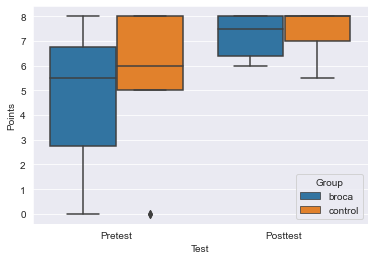

In [15]:
#df_merged = pd.merge(df_pretest, df_posttest, on="UID")

df_merged = df_pretest.append(df_posttest, ignore_index=True)

df_merged = df_merged.drop(df_merged.columns[1:9], axis= 1)
df_merged = df_merged.drop(df_merged.columns[2:4], axis= 1)

df_merged["Group"] = ""
df_merged["Test"] = ""


for i in range(40):
    if i < 20:
        df_merged.at[i, 'Test'] = "Pretest"

    else:
        df_merged.at[i, 'Test'] = "Posttest"

for index, row in df_merged.iterrows():
    if row["UID"] in control_uid:
        df_merged.loc[index, 'Group'] = 'control'
    elif row["UID"] in broca_uid:
        df_merged.loc[index, 'Group'] = 'broca'

df_merged["Points"] = df_merged[["Insgesamt", "Posttest"]].sum(axis=1)

df_merged = df_merged.loc[~((df_merged['Points'] == 0) & (df_merged['Test'] == "Posttest"))]

for index, row in df_merged.iterrows():
    if row['Test'] == "Posttest":
        if row['Points'] == 0.0:
            del row

sns.boxplot(data=df_merged, x="Test", y="Points", hue="Group", orient='v')

In [16]:
#merge df_pretest and df_posttest on uid
df_merge = pd.merge(df_pretest, df_posttest, on="UID")
#drop everything except uid, pretest and posttest
df_merge = df_merge.drop(df_merge.columns[1:19], axis= 1)
#dropna
df_merge = df_merge.dropna()

#add group column to df_merge and fill with group name (control or broca)
df_merge["Group"] = ""
for index, row in df_merge.iterrows():
    if row["UID"] in control_uid:
        df_merge.loc[index, 'Group'] = 'control'
    elif row["UID"] in broca_uid:
        df_merge.loc[index, 'Group'] = 'broca'

In [17]:
#get mean of pretest and group control
mean_control_pretest = df_merge[df_merge.Group == "control"].Pretest.mean()
#get std of pretest and group control
std_control_pretest = df_merge[df_merge.Group == "control"].Pretest.std()

#get std of pretest and group broca
mean_broca_pretest = df_merge[df_merge.Group == "broca"].Pretest.mean()

#get std of pretest and group broca
std_broca_pretest = df_merge[df_merge.Group == "broca"].Pretest.std()

#get std of posttest and group control
std_control_posttest = df_merge[df_merge.Group == "control"].Posttest.std()

#get std of posttest and group broca
std_broca_posttest = df_merge[df_merge.Group == "broca"].Posttest.std()

#get mean of pretest and group broca
mean_broca_pretest = df_merge[df_merge.Group == "broca"].Pretest.mean()

#get mean of posttest and group control
mean_control_posttest = df_merge[df_merge.Group == "control"].Posttest.mean()

#get mean of posttest and group broca
mean_broca_posttest = df_merge[df_merge.Group == "broca"].Posttest.mean()

In [18]:
df_tasks = pd.read_excel(xls, "Übungsaufgaben")

#delete rows in df_tasks where more than 10 times are nan
df_tasks = df_tasks.dropna(thresh=10)

#df_tasks drop last two rows
df_tasks = df_tasks.drop(df_tasks.index[[-2]])

#df tasks drop last column
df_tasks = df_tasks.drop(df_tasks.columns[-1], axis=1)


#df task remove column '3.3'
df_tasks = df_tasks.drop(['3.3', '6.3', '7.2'], axis= 1)

#calculate total points per row and add to df_tasks starting from 2nd column
#calculate total points per row and add to df_tasks
df_tasks['Total'] = df_tasks.iloc[:, 1:].sum(axis=1)


tasks = df_tasks.iloc[-1]

#change column 1.1 to floats
df_tasks['1.1'] = df_tasks['1.1'].astype(float)

#add empty column Percentage at end
df_tasks["Percentage"] = ""

max_points = []
for index, row in df_tasks.iterrows():
    nan_list = row[row.isnull()].index.tolist()

    if nan_list:
        total = 0
        for element in nan_list:

            if element in tasks.index:
                #if element is in tasks.index, get the value of the element
                #print(tasks[element])
                total += tasks[element]

        #remove at index in df_tasks from column total the total
        max = 155 - total
        df_tasks.at[index, 'Percentage'] = df_tasks.at[index, 'Total'] / max * 100
    else:
        df_tasks.at[index, 'Percentage'] = df_tasks.at[index, 'Total'] / 155 * 100

In [19]:
#split df_tasks into broca and control
df_tasks_broca = df_tasks[df_tasks.UID.isin(broca_uid)]
df_tasks_control = df_tasks[df_tasks.UID.isin(control_uid)]

In [20]:
#create df_broca_datatypes with only UID and 1.1 and 1.2
df_datatypes = df_tasks[['UID', '1.1', '1.2']]
df_variables = df_tasks[['UID', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6 (nur Coding)']]
df_arithmetic = df_tasks[['UID', '3.1 (Integerdivisionproblem nicht betrachtet)', '3.2.1', '3.2.2', '3.4']]
df_print = df_tasks[['UID', '4.1', '4.2']]
df_logical = df_tasks[['UID', '5.1', '5.2', '5.3', '5.4']]
df_conditional = df_tasks[['UID', '6.1', '6.2', '6.4']]
df_loops = df_tasks[['UID', '7.1', '7.3', '7.4', '7.5', '7.6 (Primzahl)', '7.7 (Primzahl)']]

#get last row of df_datatypes
points_datatypes = df_datatypes.iloc[-1]

#get last row of df_variables
points_variables = df_variables.iloc[-1]

#get last row of df_arithmetic
points_arithmetic = df_arithmetic.iloc[-1]

#get last row of df_print
points_print = df_print.iloc[-1]

#get last row of df_logical
points_logical = df_logical.iloc[-1]

#get last row of df_conditional
points_conditional = df_conditional.iloc[-1]

#get last row of df_loops
points_loops = df_loops.iloc[-1]
#get sum of points_datatypes
sum_datatypes = points_datatypes.sum()

#get sum of points_variables
sum_variables = points_variables.sum()

#get sum of points_arithmetic
sum_arithmetic = points_arithmetic.sum()

#get sum of points_print
sum_print = points_print.sum()

#get sum of points_logical
sum_logical = points_logical.sum()

#get sum of points_conditional
sum_conditional = points_conditional.sum()

#get sum of points_loops
sum_loops = points_loops.sum()

df_datatypes = df_datatypes.dropna()
df_variables = df_variables.dropna()
df_arithmetic = df_arithmetic.dropna()
df_print = df_print.dropna()
df_logical = df_logical.dropna()
df_conditional = df_conditional.dropna()
df_loops = df_loops.dropna()


#split df_datatypes in broca and control
df_datatypes_broca = df_datatypes[df_datatypes.UID.isin(broca_uid)]
df_datatypes_control = df_datatypes[df_datatypes.UID.isin(control_uid)]

#split df_variables in broca and control
df_variables_broca = df_variables[df_variables.UID.isin(broca_uid)]
df_variables_control = df_variables[df_variables.UID.isin(control_uid)]

#split df_arithmetic in broca and control
df_arithmetic_broca = df_arithmetic[df_arithmetic.UID.isin(broca_uid)]
df_arithmetic_control = df_arithmetic[df_arithmetic.UID.isin(control_uid)]

#split df_print in broca and control
df_print_broca = df_print[df_print.UID.isin(broca_uid)]
df_print_control = df_print[df_print.UID.isin(control_uid)]

#split df_logical in broca and control
df_logical_broca = df_logical[df_logical.UID.isin(broca_uid)]
df_logical_control = df_logical[df_logical.UID.isin(control_uid)]

#split df_conditional in broca and control
df_conditional_broca = df_conditional[df_conditional.UID.isin(broca_uid)]
df_conditional_control = df_conditional[df_conditional.UID.isin(control_uid)]

#split df_loops in broca and control
df_loops_broca = df_loops[df_loops.UID.isin(broca_uid)]
df_loops_control = df_loops[df_loops.UID.isin(control_uid)]

In [21]:
#add numerical row sum to df_datatypes_broca
df_datatypes_broca['Total'] = df_datatypes_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_datatypes_control
df_datatypes_control['Total'] = df_datatypes_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_variables_broca
df_variables_broca['Total'] = df_variables_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_variables_control
df_variables_control['Total'] = df_variables_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_arithmetic_broca
df_arithmetic_broca['Total'] = df_arithmetic_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_arithmetic_control
df_arithmetic_control['Total'] = df_arithmetic_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_print_broca
df_print_broca['Total'] = df_print_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_print_control
df_print_control['Total'] = df_print_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_logical_broca
df_logical_broca['Total'] = df_logical_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_logical_control
df_logical_control['Total'] = df_logical_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_conditional_broca
df_conditional_broca['Total'] = df_conditional_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_conditional_control
df_conditional_control['Total'] = df_conditional_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_loops_broca
df_loops_broca['Total'] = df_loops_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_loops_control
df_loops_control['Total'] = df_loops_control.sum(numeric_only=True, axis=1)

In [22]:
#rename df_datatypes_control total to "Datatypes Total"
df_datatypes_control.rename(columns={'Total': 'Datatypes Total'}, inplace=True)

#rename df_variables_control total to "Variables Total"
df_variables_control.rename(columns={'Total': 'Variables Total'}, inplace=True)

#rename df_arithmetic_control total to "Arithmetic Total"
df_arithmetic_control.rename(columns={'Total': 'Arithmetic Total'}, inplace=True)

#rename df_print_control total to "Print Total"
df_print_control.rename(columns={'Total': 'Print Total'}, inplace=True)

#rename df_logical_control total to "Logical Total"
df_logical_control.rename(columns={'Total': 'Logical Total'}, inplace=True)

#rename df_conditional_control total to "Conditional Total"
df_conditional_control.rename(columns={'Total': 'Conditional Total'}, inplace=True)

#rename df_loops_control total to "Loops Total"
df_loops_control.rename(columns={'Total': 'Loops Total'}, inplace=True)

In [23]:
max_datatypes = 13
max_variables = 24
max_arithmetic = 18
max_print = 14
max_logical = 20
max_conditional = 25
max_loops = 41

In [24]:
#calculate percentage from total and max
df_datatypes_control['Datatypes Percentage'] = df_datatypes_control['Datatypes Total'] / max_datatypes * 100
df_variables_control['Variables Percentage'] = df_variables_control['Variables Total'] / max_variables * 100
df_arithmetic_control['Arithmetic Percentage'] = df_arithmetic_control['Arithmetic Total'] / max_arithmetic * 100
df_print_control['Print Percentage'] = df_print_control['Print Total'] / max_print * 100
df_logical_control['Logical Percentage'] = df_logical_control['Logical Total'] / max_logical * 100
df_conditional_control['Conditional Percentage'] = df_conditional_control['Conditional Total'] / max_conditional * 100
df_loops_control['Loops Percentage'] = df_loops_control['Loops Total'] / max_loops * 100


df_total = pd.merge(df_datatypes_control, df_variables_control, on='UID')
df_total = pd.merge(df_total, df_arithmetic_control, on='UID')
df_total = pd.merge(df_total, df_print_control, on='UID')
df_total = pd.merge(df_total, df_logical_control, on='UID')
df_total = pd.merge(df_total, df_conditional_control, on='UID')
df_total = pd.merge(df_total, df_loops_control, on='UID')

#df total drop everything except uid and total
df_total.drop(df_total.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage']), 1, inplace=True)

#df_total.to_latex('df_total.tex', index=False)

In [25]:
df_posttest_programming

,UID,Aufgabe 1a,Aufgabe 1b,Aufgabe 1c,Aufgabe 1d,Aufgabe 1e,Aufgabe 1f,Aufgabe 2,Aufgabe 3,Insgesamt,Unnamed: 10
0,0LZR203,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,7.0
1,0REG243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1AGT138,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
3,1HJA213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1RBR047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3LDI060,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
6,3LST145,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
7,4ANT042,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
8,4DRO233,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
9,4MNT105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#calculate percentage from total and max for df_datatypes_broca and df_variables_broca and df_arithmetic_broca and df_print_broca and df_logical_broca and df_conditional_broca and df_loops_broca
df_datatypes_broca['Datatypes Percentage'] = df_datatypes_broca['Total'] / max_datatypes * 100
df_variables_broca['Variables Percentage'] = df_variables_broca['Total'] / max_variables * 100
df_arithmetic_broca['Arithmetic Percentage'] = df_arithmetic_broca['Total'] / max_arithmetic * 100
df_print_broca['Print Percentage'] = df_print_broca['Total'] / max_print * 100
df_logical_broca['Logical Percentage'] = df_logical_broca['Total'] / max_logical * 100
df_conditional_broca['Conditional Percentage'] = df_conditional_broca['Total'] / max_conditional * 100
df_loops_broca['Loops Percentage'] = df_loops_broca['Total'] / max_loops * 100

df_total_broca = pd.merge(df_datatypes_broca, df_variables_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_arithmetic_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_print_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_logical_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_conditional_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_loops_broca, on='UID')

display(df_posttest_programming)

#df_posttest_programming add percentage columns for insgesamt
#df_posttest_programming['Programming Percentage'] = df_posttest_programming['Insgesamt'] / 8 * 100

#add df_posttest_programming to df_total_broca
df_total_broca = pd.merge(df_total_broca, df_posttest_programming, on='UID')

#remove everything except uid and percentage
df_total_broca.drop(df_total_broca.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage', 'Programming Percentage']), 1, inplace=True)

#cut percentage with 1 rounded number after comma
df_total_broca['Datatypes Percentage'] = df_total_broca['Datatypes Percentage'].round(1)
df_total_broca['Variables Percentage'] = df_total_broca['Variables Percentage'].round(1)
df_total_broca['Arithmetic Percentage'] = df_total_broca['Arithmetic Percentage'].round(1)
df_total_broca['Print Percentage'] = df_total_broca['Print Percentage'].round(1)
df_total_broca['Logical Percentage'] = df_total_broca['Logical Percentage'].round(1)
df_total_broca['Conditional Percentage'] = df_total_broca['Conditional Percentage'].round(1)
df_total_broca['Loops Percentage'] = df_total_broca['Loops Percentage'].round(1)

#df_pretest calculate percentage from total and max
df_posttest['Post-Percentage'] = df_posttest['Posttest'] / 8 * 100
df_posttest['Pre-Percentage'] = df_posttest['Pretest'] / 8 * 100

#round percentage with 1 number after comma
df_posttest['Post-Percentage'] = df_posttest['Post-Percentage'].round(1)
df_posttest['Pre-Percentage'] = df_posttest['Pre-Percentage'].round(1)

df_total_broca = pd.merge(df_total_broca, df_posttest, on='UID')

#df_total_broca drop everything except uid and percentages
df_total_broca.drop(df_total_broca.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage', 'Pre-Percentage', 'Post-Percentage', 'Programming Percentage']), 1, inplace=True)

#df_total_broca move Pre-Percentage to second column
cols = list(df_total_broca.columns.values)
df_total_broca = df_total_broca[cols[0:1] + cols[-1:] + cols[1:-1]]

#df_total_broca.to_latex('df_total_broca.tex', index=False)

,UID,Aufgabe 1a,Aufgabe 1b,Aufgabe 1c,Aufgabe 1d,Aufgabe 1e,Aufgabe 1f,Aufgabe 2,Aufgabe 3,Insgesamt,Unnamed: 10
0,0LZR203,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,7.0
1,0REG243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1AGT138,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
3,1HJA213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1RBR047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3LDI060,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
6,3LST145,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
7,4ANT042,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
8,4DRO233,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,8.0
9,4MNT105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#add numerical row sum to df_datatypes
df_datatypes['Total'] = df_datatypes.sum(numeric_only=True, axis=1)

#add numerical row sum to df_variables
df_variables['Total'] = df_variables.sum(numeric_only=True, axis=1)

#add numerical row sum to df_arithmetic
df_arithmetic['Total'] = df_arithmetic.sum(numeric_only=True, axis=1)

#add numerical row sum to df_print
df_print['Total'] = df_print.sum(numeric_only=True, axis=1)

#add numerical row sum to df_logical
df_logical['Total'] = df_logical.sum(numeric_only=True, axis=1)

#add numerical row sum to df_conditional
df_conditional['Total'] = df_conditional.sum(numeric_only=True, axis=1)

#add numerical row sum to df_loops
df_loops['Total'] = df_loops.sum(numeric_only=True, axis=1)

#add column group to df_datatypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops and check if uid is in broca or control group

df_datatypes['Group'] = np.where(df_datatypes['UID'].isin(broca_uid), 'Broca', 'Control')
df_variables['Group'] = np.where(df_variables['UID'].isin(broca_uid), 'Broca', 'Control')
df_arithmetic['Group'] = np.where(df_arithmetic['UID'].isin(broca_uid), 'Broca', 'Control')
df_print['Group'] = np.where(df_print['UID'].isin(broca_uid), 'Broca', 'Control')
df_logical['Group'] = np.where(df_logical['UID'].isin(broca_uid), 'Broca', 'Control')
df_conditional['Group'] = np.where(df_conditional['UID'].isin(broca_uid), 'Broca', 'Control')
df_loops['Group'] = np.where(df_loops['UID'].isin(broca_uid), 'Broca', 'Control')


#remove last row in df_datatypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops
df_datatypes = df_datatypes.iloc[:-1]
df_variables = df_variables.iloc[:-1]
df_arithmetic = df_arithmetic.iloc[:-1]
df_print = df_print.iloc[:-1]
df_logical = df_logical.iloc[:-1]
df_conditional = df_conditional.iloc[:-1]
df_loops = df_loops.iloc[:-1]

display(df_datatypes)


,UID,1.1,1.2,Total,Group
0,0LZR203,6.0,7.0,13.0,Broca
1,0REG243,6.0,7.0,13.0,Broca
2,1AGT138,6.0,7.0,13.0,Broca
5,3LDI060,6.0,7.0,13.0,Broca
6,3LST145,6.0,7.0,13.0,Broca
7,4ANT042,6.0,7.0,13.0,Broca
8,4DRO233,6.0,7.0,13.0,Control
11,5NSA280,6.0,7.0,13.0,Control
12,6CSA143,6.0,7.0,13.0,Control
13,7BGT235,6.0,7.0,13.0,Broca


In [28]:
#calculate df_datatypes percentage and add to df_datatypes
df_datatypes['Percentage'] = df_datatypes['Total'] / max_datatypes * 100
df_variables['Percentage'] = df_variables['Total'] / max_variables * 100
df_arithmetic['Percentage'] = df_arithmetic['Total'] / max_arithmetic * 100
df_print['Percentage'] = df_print['Total'] / max_print * 100
df_logical['Percentage'] = df_logical['Total'] / max_logical * 100
df_conditional['Percentage'] = df_conditional['Total'] / max_conditional * 100
df_loops['Percentage'] = df_loops['Total'] / max_loops * 100

In [29]:
#add new column for original df with name of category
df_datatypes = df_datatypes[['Percentage', 'Group']]
df_datatypes['Category'] = 'Datatypes'

df_variables = df_variables[['Percentage', 'Group']]
df_variables['Category'] = 'Variables'

df_arithmetic = df_arithmetic[['Percentage', 'Group']]
df_arithmetic['Category'] = 'Arithmetic'

df_print = df_print[['Percentage', 'Group']]
df_print['Category'] = 'Print'

df_logical = df_logical[['Percentage', 'Group']]
df_logical['Category'] = 'Logical'

df_conditional = df_conditional[['Percentage', 'Group']]
df_conditional['Category'] = 'Conditional'

df_loops = df_loops[['Percentage', 'Group']]
df_loops['Category'] = 'Loops'


In [30]:
#append df_datypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops but only Total, Group and Category
df = df_datatypes.append(df_variables)

In [31]:
df_total = df_datatypes[['Percentage', 'Group', 'Category']].append(df_variables[['Percentage', 'Group', 'Category']]).append(df_arithmetic[['Percentage', 'Group', 'Category']]).append(df_print[['Percentage', 'Group', 'Category']]).append(df_logical[['Percentage', 'Group', 'Category']]).append(df_conditional[['Percentage', 'Group', 'Category']]).append(df_loops[['Percentage', 'Group', 'Category']])

#rename broca and control in yes and no for group
df_total['Group'] = df_total['Group'].replace(['Broca', 'Control'], ['broca', 'control'])

In [32]:
df_total['Group'] = df_total['Group'].replace(['broca', 'control'], ['Brocanto', 'Git'])

In [33]:
#rename column Group with value test to broca
df_merged = df_merged.replace({'Group': {'test': 'broca'}})

df_merged = df_merged.rename(columns={"test": "broca"})

df_merged['Group'] = df_merged['Group'].replace(['broca', 'control'], ['Brocanto', 'Git'])

display(df_merged)

,UID,Insgesamt,Posttest,Group,Test,Points
0,0LZR203,2.5,NaN,Brocanto,Pretest,2.5
1,0REG243,5.0,NaN,Brocanto,Pretest,5.0
2,1AGT138,3.0,NaN,Brocanto,Pretest,3.0
3,1HJA213,6.0,NaN,Brocanto,Pretest,6.0
4,1RBR047,8.0,NaN,Git,Pretest,8.0
5,3LDI060,0.0,NaN,Brocanto,Pretest,0.0
6,3LST145,6.0,NaN,Brocanto,Pretest,6.0
7,4ANT042,7.5,NaN,Brocanto,Pretest,7.5
8,4DRO233,7.0,NaN,Git,Pretest,7.0
9,4MNT105,0.0,NaN,Git,Pretest,0.0


In [34]:
#calculate percentage in df_merged points
df_merged['Percentage of correct answers'] = df_merged['Points'] / 8 * 100

In [35]:
#df_total rename broca and control to Brocanto and Git
df_total['Group'] = df_total['Group'].replace(['broca', 'control'], ['Brocanto', 'Git'])

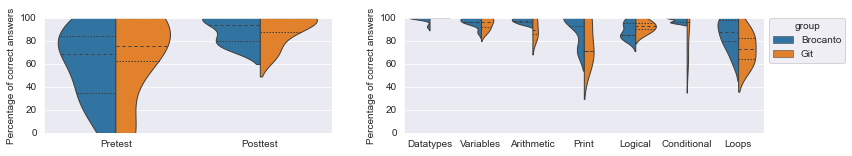

In [36]:
#use subplots for two violinplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))

#subplots adjust space between plots
fig.subplots_adjust(wspace=0.5)

#adjust width of first subplot
ax1.set_position([0.1, 0.1, 0.4, 0.8])

#adjust width of second subplot
ax2.set_position([0.6, 0.1, 0.5, 0.8])


violin1 = sns.violinplot(data=df_merged, x="Test", y="Percentage of correct answers", hue="Group",
                         split=True, inner="quart", linewidth=1, ax=ax1)
#violin1.legend(title='Group', loc='center left', bbox_to_anchor=(1, 0.8))
#remove legend from violin1
violin1.legend_.remove()

#violin y-axis limit
violin1.set(ylim=(0, 100))

violin2 = sns.violinplot(data=df_total, x="Category", y="Percentage", hue="Group",
                         split=True, inner="quart", linewidth=1, spanmode="hard", ax=ax2)

violin2.set(xlabel='Programming construct', ylabel='Percentage of correct answers')
violin2.set(ylim=(0, 100))
violin2.set_title('Programming exercises per construct')

#rename legend broca and control to Brocanto and Git
violin2.legend(title='group', loc='center left', bbox_to_anchor=(1, 0.8))

#rotate xticks
#remove violin 2 title
violin2.set_title('')
#remove violin2 x axis label
violin2.set_xlabel('')
#remove violin1 x axis label
violin1.set_xlabel('')

plt.savefig('violinplot_pretest_posttest_exercises.pdf', bbox_inches='tight', pad_inches=0)

Statistical tests

In [37]:
from pingouin import ancova
ancova(data=df_merge, dv='Posttest', covar='Pretest', between='Group')

,Source,SS,DF,F,p-unc,np2
0,Group,0.011774,1,0.012531,0.913083,0.001252
1,Pretest,1.373382,1,1.461765,0.254459,0.127534
2,Residual,9.395368,10,NaN,NaN,NaN


In [38]:
from scipy import stats
#performan friedman test

stats.kruskal(broca_pretest, control_pretest, broca_posttest, control_posttest)

KruskalResult(statistic=7.164678548134038, pvalue=0.06683007580932834)

In [39]:
#split df_tasks into broca and control
df_tasks_broca = df_tasks[df_tasks.UID.isin(broca_uid)]
df_tasks_control = df_tasks[df_tasks.UID.isin(control_uid)]

df_tasks_control["Percentage"].mean()

87.12312882142105

In [40]:
df_tasks_broca["Percentage"].mean()

92.82612116443745

Statistical tests

In [41]:
from pingouin import ancova
ancova(data=df_merge, dv='Posttest', covar='Pretest', between='Group')


import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load the data into a pandas DataFrame

display(df_merge)

# Fit a linear regression model using the 'ols' function
model = smf.ols(formula="Posttest ~ Pretest + Group", data=df_merge)
results = model.fit()

# Perform an ANOVA using the 'anova_lm' function
aov_table = sm.stats.anova_lm(results, typ=2)

,UID,Pretest,Posttest,Group
0,0LZR203,2.5,8.0,broca
2,1AGT138,3.0,7.0,broca
5,3LDI060,0.0,8.0,broca
6,3LST145,6.0,6.0,broca
7,4ANT042,7.5,6.5,broca
8,4DRO233,7.0,8.0,control
11,5NSA280,5.0,8.0,control
12,6CSA143,0.0,5.5,control
13,7BGT235,7.5,8.0,broca
14,7KSM240,5.0,7.0,control


In [42]:
print(stats.shapiro(broca_pretest))
print(stats.shapiro(broca_posttest))

print(stats.shapiro(control_pretest))
print(stats.shapiro(control_posttest))

stats.kruskal(broca_pretest, control_pretest, broca_posttest, control_posttest)

ShapiroResult(statistic=0.930485725402832, pvalue=0.41578808426856995)
ShapiroResult(statistic=0.7830300331115723, pvalue=0.01878974959254265)
ShapiroResult(statistic=0.8021617531776428, pvalue=0.021614786237478256)
ShapiroResult(statistic=0.7544269561767578, pvalue=0.03269243612885475)


KruskalResult(statistic=7.164678548134038, pvalue=0.06683007580932834)

In [43]:
#merge df_pretest and df_posttest on uid
df_merge = pd.merge(df_pretest, df_posttest, on="UID")
#drop everything except uid, pretest and posttest
df_merge = df_merge.drop(df_merge.columns[1:19], axis= 1)
#dropna
df_merge = df_merge.dropna()

#add group column to df_merge and fill with group name (control or broca)
df_merge["Group"] = ""
for index, row in df_merge.iterrows():
    if row["UID"] in control_uid:
        df_merge.loc[index, 'Group'] = 'control'
    elif row["UID"] in broca_uid:
        df_merge.loc[index, 'Group'] = 'broca'

from pingouin import ancova
display(df_merge)
ancova(data=df_merge, dv='Posttest', covar='Pretest', between='Group')

,UID,Pretest,Posttest,Post-Percentage,Pre-Percentage,Group
0,0LZR203,2.5,8.0,100.0,31.2,broca
2,1AGT138,3.0,7.0,87.5,37.5,broca
5,3LDI060,0.0,8.0,100.0,0.0,broca
6,3LST145,6.0,6.0,75.0,75.0,broca
7,4ANT042,7.5,6.5,81.2,93.8,broca
8,4DRO233,7.0,8.0,100.0,87.5,control
11,5NSA280,5.0,8.0,100.0,62.5,control
12,6CSA143,0.0,5.5,68.8,0.0,control
13,7BGT235,7.5,8.0,100.0,93.8,broca
14,7KSM240,5.0,7.0,87.5,62.5,control


,Source,SS,DF,F,p-unc,np2
0,Group,0.011774,1,0.012531,0.913083,0.001252
1,Pretest,1.373382,1,1.461765,0.254459,0.127534
2,Residual,9.395368,10,NaN,NaN,NaN


In [44]:
#split df_tasks into broca and control
df_tasks_broca = df_tasks[df_tasks.UID.isin(broca_uid)]
df_tasks_control = df_tasks[df_tasks.UID.isin(control_uid)]


In [45]:
#open Vorkurs_22_with_brocanto_transposed.xlsx
df = pd.read_excel('../data/precourse_22_with_brocanto_transposed.xlsx')

In [46]:
#create scatterplot with seaborn from df
#rename columnheader
df = df.rename(columns={'Unnamed: 0': 'UID'})
df = df.rename(columns={1: 'Testblock1', 2: "Testblock2"})
#rename 3 to Testblock3, 4 to Testblock4, 5 to Testblock5, 6 to Testblock6, 7 to Testblock7, 8 to Testblock8, 9 to Testblock9, 10 to Testblock10, 11 to Testblock11, 12 to Testblock12, 13 to Testblock13, 14 to Testblock14, 15 to Testblock15
df = df.rename(columns={3: 'Testblock3', 4: "Testblock4", 5: "Testblock5", 6: "Testblock6", 7: "Testblock7", 8: "Testblock8", 9: "Testblock9", 10: "Testblock10", 11: "Testblock11", 12: "Testblock12", 13: "Testblock13", 14: "Testblock14", 15: "Testblock15"})

#score *= 10
df['Testblock1'] *= 10
df['Testblock2'] *= 10
df['Testblock3'] *= 10
df['Testblock4'] *= 10
df['Testblock5'] *= 10
df['Testblock6'] *= 10
df['Testblock7'] *= 10
df['Testblock8'] *= 10
df['Testblock9'] *= 10
df['Testblock10'] *= 10
df['Testblock11'] *= 10
df['Testblock12'] *= 10
df['Testblock13'] *= 10
df['Testblock14'] *= 10
df['Testblock15'] *= 10

In [47]:
#remove UID 0REG243, 1HJA213, 8CHT208
df = df[df.UID != '0REG243']
df = df[df.UID != '1HJA213']
df = df[df.UID != '8CHT208']

df['UID'] = df['UID'].replace(['0LZR203'], ['PB1'])
df['UID'] = df['UID'].replace(['1AGT138'], ['PB2'])
df['UID'] = df['UID'].replace(['3LDI060'], ['PB3'])
df['UID'] = df['UID'].replace(['3LST145'], ['PB4'])
df['UID'] = df['UID'].replace(['4ANT042'], ['PB5'])
df['UID'] = df['UID'].replace(['7BGT235'], ['PB6'])
df['UID'] = df['UID'].replace(['7RAI228'], ['PB7'])
df['UID'] = df['UID'].replace(['7SOA133'], ['PB8'])

#create new row at end with mean of Testblock1 to Testblock15
df.loc['mean'] = df.mean()

In [48]:
df['UID'] = df['UID'].replace([np.nan], ['mean'])

In [49]:
#create for every uid the data of the testblocks in a new row
df = df.melt(id_vars=['UID'], var_name='Testblock', value_name='Percentage of correct answers')

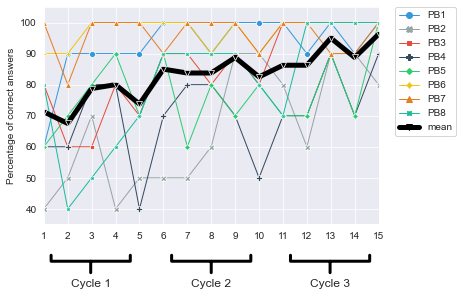

In [50]:
plt.ylim(0,105)
plt.xlabel('')

#combine line and scatterplot
sns.lineplot(data=df, x="Testblock", y="Percentage of correct answers", hue="UID", style="UID", markers=True, dashes=False, legend='full', size="UID", sizes=[1, 1, 1, 1, 1, 1, 1, 1, 5], palette=dict(mean="#000000", PB1="#3498db", PB2="#95a5a6", PB3="#e74c3c", PB4="#34495e", PB5="#2ecc71", PB6="#f1c40f", PB7="#e67e22", PB8="#1abc9c", height=4, aspect=1.5))


#change background color to white
sns.set_style("whitegrid")

#change x ticks from Testblock1 to 1
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'])

#show legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#set xlim to 1-15
plt.ylim(35, 105)
plt.xlim(0, 14)

plt.annotate('Cycle 1', xy=(0.14, -0.16), xytext=(0.14, -0.25), xycoords='axes fraction', textcoords='axes fraction', size=12, ha='center', va='top', bbox=dict(boxstyle='square', fc='w'),
             arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=.5', lw=3.0, color="black"))
plt.annotate('Cycle 2', xy=(0.5, -0.16), xytext=(0.5, -0.25), xycoords='axes fraction', textcoords='axes fraction', size=12, ha='center', va='top', bbox=dict(boxstyle='square', fc='w'),
             arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=.5', lw=3.0, color="black"))
plt.annotate('Cycle 3', xy=(0.855, -0.16), xytext=(0.855, -0.25), xycoords='axes fraction', textcoords='axes fraction', size=12, ha='center', va='top', bbox=dict(boxstyle='square', fc='w'),
             arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=.5', lw=3.0, color="black"))


#remove x legend
plt.xlabel('')


plt.savefig('../figures/lineplot.pdf', bbox_inches='tight', pad_inches=0.0)

In [ ]:
#calculate percentage from total and max for df_datatypes_broca and df_variables_broca and df_arithmetic_broca and df_print_broca and df_logical_broca and df_conditional_broca and df_loops_broca
df_datatypes_broca['Datatypes Percentage'] = df_datatypes_broca['Total'] / max_datatypes * 100
df_variables_broca['Variables Percentage'] = df_variables_broca['Total'] / max_variables * 100
df_arithmetic_broca['Arithmetic Percentage'] = df_arithmetic_broca['Total'] / max_arithmetic * 100
df_print_broca['Print Percentage'] = df_print_broca['Total'] / max_print * 100
df_logical_broca['Logical Percentage'] = df_logical_broca['Total'] / max_logical * 100
df_conditional_broca['Conditional Percentage'] = df_conditional_broca['Total'] / max_conditional * 100
df_loops_broca['Loops Percentage'] = df_loops_broca['Total'] / max_loops * 100

df_total_broca = pd.merge(df_datatypes_broca, df_variables_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_arithmetic_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_print_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_logical_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_conditional_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_loops_broca, on='UID')

display(df_posttest_programming)

#df_posttest_programming add percentage columns for insgesamt
#df_posttest_programming['Programming Percentage'] = df_posttest_programming['Insgesamt'] / 8 * 100

#add df_posttest_programming to df_total_broca
df_total_broca = pd.merge(df_total_broca, df_posttest_programming, on='UID')

#remove everything except uid and percentage
df_total_broca.drop(df_total_broca.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage', 'Programming Percentage']), 1, inplace=True)

#cut percentage with 1 rounded number after comma
df_total_broca['Datatypes Percentage'] = df_total_broca['Datatypes Percentage']
df_total_broca['Variables Percentage'] = df_total_broca['Variables Percentage']
df_total_broca['Arithmetic Percentage'] = df_total_broca['Arithmetic Percentage']
df_total_broca['Print Percentage'] = df_total_broca['Print Percentage']
df_total_broca['Logical Percentage'] = df_total_broca['Logical Percentage']
df_total_broca['Conditional Percentage'] = df_total_broca['Conditional Percentage']
df_total_broca['Loops Percentage'] = df_total_broca['Loops Percentage']

#display(df_posttest)
#df_pretest calculate percentage from total and max
df_posttest['Post-Percentage'] = df_posttest['Posttest'] / 8 * 100
df_posttest['Pre-Percentage'] = df_posttest['Pretest'] / 8 * 100

#round percentage with 1 number after comma
df_posttest['Post-Percentage'] = df_posttest['Post-Percentage']
df_posttest['Pre-Percentage'] = df_posttest['Pre-Percentage']

df_total_broca = pd.merge(df_total_broca, df_posttest, on='UID')

#df_total_broca drop everything except uid and percentages
df_total_broca.drop(df_total_broca.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage', 'Pre-Percentage', 'Post-Percentage', 'Programming Percentage']), 1, inplace=True)

#df_total_broca move Pre-Percentage to second column
cols = list(df_total_broca.columns.values)
df_total_broca = df_total_broca[cols[0:1] + cols[-1:] + cols[1:-1]]

df_total_broca.to_latex('df_total_broca.tex', index=False)

In [ ]:
#add numerical row sum to df_datatypes
df_datatypes['Total'] = df_datatypes.sum(numeric_only=True, axis=1)

#add numerical row sum to df_variables
df_variables['Total'] = df_variables.sum(numeric_only=True, axis=1)

#add numerical row sum to df_arithmetic
df_arithmetic['Total'] = df_arithmetic.sum(numeric_only=True, axis=1)

#add numerical row sum to df_print
df_print['Total'] = df_print.sum(numeric_only=True, axis=1)

#add numerical row sum to df_logical
df_logical['Total'] = df_logical.sum(numeric_only=True, axis=1)

#add numerical row sum to df_conditional
df_conditional['Total'] = df_conditional.sum(numeric_only=True, axis=1)

#add numerical row sum to df_loops
df_loops['Total'] = df_loops.sum(numeric_only=True, axis=1)

#add column group to df_datatypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops and check if uid is in broca or control group

import numpy as np

display(df_variables)
df_datatypes['Group'] = np.where(df_datatypes['UID'].isin(broca_uid), 'Broca', 'Control')
df_variables['Group'] = np.where(df_variables['UID'].isin(broca_uid), 'Broca', 'Control')
df_arithmetic['Group'] = np.where(df_arithmetic['UID'].isin(broca_uid), 'Broca', 'Control')
df_print['Group'] = np.where(df_print['UID'].isin(broca_uid), 'Broca', 'Control')
df_logical['Group'] = np.where(df_logical['UID'].isin(broca_uid), 'Broca', 'Control')
df_conditional['Group'] = np.where(df_conditional['UID'].isin(broca_uid), 'Broca', 'Control')
df_loops['Group'] = np.where(df_loops['UID'].isin(broca_uid), 'Broca', 'Control')

display(df_datatypes)

#remove last row in df_datatypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops
df_datatypes = df_datatypes.iloc[:-1]
df_variables = df_variables.iloc[:-1]
df_arithmetic = df_arithmetic.iloc[:-1]
df_print = df_print.iloc[:-1]
df_logical = df_logical.iloc[:-1]
df_conditional = df_conditional.iloc[:-1]
df_loops = df_loops.iloc[:-1]

In [ ]:
max_datatypes = 13
max_variables = 24
max_arithmetic = 18
max_print = 14
max_logical = 20
max_conditional = 25
max_loops = 41

In [ ]:
display(df_datatypes)

#calculate df_datatypes percentage and add to df_datatypes
df_datatypes['Percentage'] = df_datatypes['Total'] / max_datatypes * 100
df_variables['Percentage'] = df_variables['Total'] / max_variables * 100
df_arithmetic['Percentage'] = df_arithmetic['Total'] / max_arithmetic * 100
df_print['Percentage'] = df_print['Total'] / max_print * 100
df_logical['Percentage'] = df_logical['Total'] / max_logical * 100
df_conditional['Percentage'] = df_conditional['Total'] / max_conditional * 100
df_loops['Percentage'] = df_loops['Total'] / max_loops * 100

In [ ]:
#add new column for original df with name of category
df_datatypes = df_datatypes[['Percentage', 'Group']]
df_datatypes['Category'] = 'Datatypes'

df_variables = df_variables[['Percentage', 'Group']]
df_variables['Category'] = 'Variables'

df_arithmetic = df_arithmetic[['Percentage', 'Group']]
df_arithmetic['Category'] = 'Arithmetic'

df_print = df_print[['Percentage', 'Group']]
df_print['Category'] = 'Print'

df_logical = df_logical[['Percentage', 'Group']]
df_logical['Category'] = 'Logical'

df_conditional = df_conditional[['Percentage', 'Group']]
df_conditional['Category'] = 'Conditional'

df_loops = df_loops[['Percentage', 'Group']]
df_loops['Category'] = 'Loops'

In [ ]:
#append df_datypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops but only Total, Group and Category
df = df_datatypes.append(df_variables)

In [ ]:
df_total = df_datatypes[['Percentage', 'Group', 'Category']].append(df_variables[['Percentage', 'Group', 'Category']]).append(df_arithmetic[['Percentage', 'Group', 'Category']]).append(df_print[['Percentage', 'Group', 'Category']]).append(df_logical[['Percentage', 'Group', 'Category']]).append(df_conditional[['Percentage', 'Group', 'Category']]).append(df_loops[['Percentage', 'Group', 'Category']])

display(df_total)

#rename broca and control in yes and no for group
df_total['Group'] = df_total['Group'].replace(['Broca', 'Control'], ['broca', 'control'])

In [ ]:
import seaborn as sns

#show 100 rows in display
pd.set_option('display.max_rows', 100)

#dftotal rename Broca and Control to test and control
df_total['Group'] = df_total['Group'].replace(['broca', 'Control'], ['test', 'control'])

display(df_total)


sns.set_theme(style="whitegrid")

violin = sns.violinplot(data=df_total, x="Category", y="Percentage", hue="Group",
               split=True, inner="quart", linewidth=1, spanmode="hard")

violin.set(xlabel='Programming construct', ylabel='Percentage of correct answers')
#violin.set(ylim=(0, 100))
violin.set_title('Programming exercises per construct')

violin.legend(title='Group', loc='center left', bbox_to_anchor=(1, 0.8))

plt.savefig('violinplot_exercises.pdf', bbox_inches='tight')

In [ ]:
df_datatypes_broca

Statistical tests

In [ ]:
from pingouin import ancova
ancova(data=df_merge, dv='Posttest', covar='Pretest', between='Group')


import statsmodels.formula.api as smf
import statsmodels.api as sm

# Load the data into a pandas DataFrame

display(df_merge)

# Fit a linear regression model using the 'ols' function
model = smf.ols(formula="Posttest ~ Pretest + Group", data=df_merge)
results = model.fit()

# Perform an ANOVA using the 'anova_lm' function
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)


In [ ]:
from scipy import stats

print(stats.shapiro(broca_pretest))
print(stats.shapiro(broca_posttest))

print(stats.shapiro(control_pretest))
print(stats.shapiro(control_posttest))

stats.kruskal(broca_pretest, control_pretest, broca_posttest, control_posttest)

In [ ]:
#merge df_pretest and df_posttest on uid
df_merge = pd.merge(df_pretest, df_posttest, on="UID")
#drop everything except uid, pretest and posttest
df_merge = df_merge.drop(df_merge.columns[1:19], axis= 1)
#dropna
df_merge = df_merge.dropna()

#add group column to df_merge and fill with group name (control or broca)
df_merge["Group"] = ""
for index, row in df_merge.iterrows():
    if row["UID"] in control_uid:
        df_merge.loc[index, 'Group'] = 'control'
    elif row["UID"] in broca_uid:
        df_merge.loc[index, 'Group'] = 'broca'

from pingouin import ancova
display(df_merge)
ancova(data=df_merge, dv='Posttest', covar='Pretest', between='Group')

In [ ]:
#get mean of pretest and group control
mean_control_pretest = df_merge[df_merge.Group == "control"].Pretest.mean()
#get std of pretest and group control
std_control_pretest = df_merge[df_merge.Group == "control"].Pretest.std()

#get std of pretest and group broca
mean_broca_pretest = df_merge[df_merge.Group == "broca"].Pretest.mean()

#get std of pretest and group broca
std_broca_pretest = df_merge[df_merge.Group == "broca"].Pretest.std()

#get std of posttest and group control
std_control_posttest = df_merge[df_merge.Group == "control"].Posttest.std()

#get std of posttest and group broca
std_broca_posttest = df_merge[df_merge.Group == "broca"].Posttest.std()

#get mean of pretest and group broca
mean_broca_pretest = df_merge[df_merge.Group == "broca"].Pretest.mean()

#get mean of posttest and group control
mean_control_posttest = df_merge[df_merge.Group == "control"].Posttest.mean()

#get mean of posttest and group broca
mean_broca_posttest = df_merge[df_merge.Group == "broca"].Posttest.mean()

#print means and stds
print("Mean Broca Pretest: ", mean_broca_pretest)
print("Std Broca Pretest: ", std_broca_pretest)
print("Mean Control Pretest: ", mean_control_pretest)
print("Std Control Pretest: ", std_control_pretest)
print()
print("Mean Broca Posttest: ", mean_broca_posttest)
print("Std Broca Posttest: ", std_broca_posttest)
print("Mean Control Posttest: ", mean_control_posttest)
print("Std Control Posttest: ", std_control_posttest)

In [ ]:
import numpy as np

df_tasks = pd.read_excel(xls, "Übungsaufgaben")

#delete rows in df_tasks where more than 10 times are nan
df_tasks = df_tasks.dropna(thresh=10)

#df_tasks drop last two rows
df_tasks = df_tasks.drop(df_tasks.index[[-2]])

#df tasks drop last column
df_tasks = df_tasks.drop(df_tasks.columns[-1], axis=1)

display(df_tasks)

#df tasks drop column total
#df_tasks = df_tasks.drop(df_tasks.columns[-1], axis= 1)


#df task remove column '3.3'
df_tasks = df_tasks.drop(['3.3', '6.3', '7.2'], axis= 1)

#calculate total points per row and add to df_tasks starting from 2nd column
#calculate total points per row and add to df_tasks
df_tasks['Total'] = df_tasks.iloc[:, 1:].sum(axis=1)

display(df_tasks["Total"])

tasks = df_tasks.iloc[-1]

#change column 1.1 to floats
df_tasks['1.1'] = df_tasks['1.1'].astype(float)

#add empty column Percentage at end
df_tasks["Percentage"] = ""

max_points = []
for index, row in df_tasks.iterrows():
    nan_list = row[row.isnull()].index.tolist()

    if nan_list:
        total = 0
        for element in nan_list:

            if element in tasks.index:
                #if element is in tasks.index, get the value of the element
                #print(tasks[element])
                total += tasks[element]
        print(total)

        #remove at index in df_tasks from column total the total
        max = 155 - total
        df_tasks.at[index, 'Percentage'] = df_tasks.at[index, 'Total'] / max * 100
    else:
        df_tasks.at[index, 'Percentage'] = df_tasks.at[index, 'Total'] / 155 * 100

#print(max_points)

#calculate percentage of total points per row and add to df_tasks starting from 2nd column
#df_tasks["Percentage"] = df_tasks["Total"] / 155 * 100

display(df_tasks)

In [ ]:
#split df_tasks into broca and control
df_tasks_broca = df_tasks[df_tasks.UID.isin(broca_uid)]
df_tasks_control = df_tasks[df_tasks.UID.isin(control_uid)]

display(df_tasks_broca)
display(df_tasks_control)

df_tasks_control["Percentage"].mean()

In [ ]:
df_tasks_broca["Percentage"].mean()

In [ ]:
#create df_broca_datatypes with only UID and 1.1 and 1.2
df_datatypes = df_tasks[['UID', '1.1', '1.2']]

df_variables = df_tasks[['UID', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6 (nur Coding)']]

df_arithmetic = df_tasks[['UID', '3.1 (Integerdivisionproblem nicht betrachtet)', '3.2.1', '3.2.2', '3.4']]

df_print = df_tasks[['UID', '4.1', '4.2']]

df_logical = df_tasks[['UID', '5.1', '5.2', '5.3', '5.4']]

df_conditional = df_tasks[['UID', '6.1', '6.2', '6.4']]

df_loops = df_tasks[['UID', '7.1', '7.3', '7.4', '7.5', '7.6 (Primzahl)', '7.7 (Primzahl)']]


#get last row of df_datatypes
points_datatypes = df_datatypes.iloc[-1]

#get last row of df_variables
points_variables = df_variables.iloc[-1]

#get last row of df_arithmetic
points_arithmetic = df_arithmetic.iloc[-1]

#get last row of df_print
points_print = df_print.iloc[-1]

#get last row of df_logical
points_logical = df_logical.iloc[-1]

#get last row of df_conditional
points_conditional = df_conditional.iloc[-1]

#get last row of df_loops
points_loops = df_loops.iloc[-1]
#get sum of points_datatypes
sum_datatypes = points_datatypes.sum()

#get sum of points_variables
sum_variables = points_variables.sum()

#get sum of points_arithmetic
sum_arithmetic = points_arithmetic.sum()

#get sum of points_print
sum_print = points_print.sum()

#get sum of points_logical
sum_logical = points_logical.sum()

#get sum of points_conditional
sum_conditional = points_conditional.sum()

#get sum of points_loops
sum_loops = points_loops.sum()

df_datatypes = df_datatypes.dropna()
df_variables = df_variables.dropna()
df_arithmetic = df_arithmetic.dropna()
df_print = df_print.dropna()
df_logical = df_logical.dropna()
df_conditional = df_conditional.dropna()
df_loops = df_loops.dropna()


#split df_datatypes in broca and control
df_datatypes_broca = df_datatypes[df_datatypes.UID.isin(broca_uid)]
df_datatypes_control = df_datatypes[df_datatypes.UID.isin(control_uid)]

#split df_variables in broca and control
df_variables_broca = df_variables[df_variables.UID.isin(broca_uid)]
df_variables_control = df_variables[df_variables.UID.isin(control_uid)]

#split df_arithmetic in broca and control
df_arithmetic_broca = df_arithmetic[df_arithmetic.UID.isin(broca_uid)]
df_arithmetic_control = df_arithmetic[df_arithmetic.UID.isin(control_uid)]

#split df_print in broca and control
df_print_broca = df_print[df_print.UID.isin(broca_uid)]
df_print_control = df_print[df_print.UID.isin(control_uid)]

#split df_logical in broca and control
df_logical_broca = df_logical[df_logical.UID.isin(broca_uid)]
df_logical_control = df_logical[df_logical.UID.isin(control_uid)]

#split df_conditional in broca and control
df_conditional_broca = df_conditional[df_conditional.UID.isin(broca_uid)]
df_conditional_control = df_conditional[df_conditional.UID.isin(control_uid)]

#split df_loops in broca and control
df_loops_broca = df_loops[df_loops.UID.isin(broca_uid)]
df_loops_control = df_loops[df_loops.UID.isin(control_uid)]


In [ ]:
#add numerical row sum to df_datatypes_broca
df_datatypes_broca['Total'] = df_datatypes_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_datatypes_control
df_datatypes_control['Total'] = df_datatypes_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_variables_broca
df_variables_broca['Total'] = df_variables_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_variables_control
df_variables_control['Total'] = df_variables_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_arithmetic_broca
df_arithmetic_broca['Total'] = df_arithmetic_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_arithmetic_control
df_arithmetic_control['Total'] = df_arithmetic_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_print_broca
df_print_broca['Total'] = df_print_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_print_control
df_print_control['Total'] = df_print_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_logical_broca
df_logical_broca['Total'] = df_logical_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_logical_control
df_logical_control['Total'] = df_logical_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_conditional_broca
df_conditional_broca['Total'] = df_conditional_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_conditional_control
df_conditional_control['Total'] = df_conditional_control.sum(numeric_only=True, axis=1)


#add numerical row sum to df_loops_broca
df_loops_broca['Total'] = df_loops_broca.sum(numeric_only=True, axis=1)

#add numerical row sum to df_loops_control
df_loops_control['Total'] = df_loops_control.sum(numeric_only=True, axis=1)

#print number of rows in df_datatypes_broca



In [ ]:
print('Number of rows in df_datatypes_broca: ', len(df_conditional_broca))
print('Number of rows in df_datatypes_control: ', len(df_conditional_control))

print('Number of rows in df_loops_broca: ', len(df_loops_broca))
print('Number of rows in df_loops_control: ', len(df_loops_control))


In [ ]:
display(df_datatypes_broca)

display(df_conditional_control)

In [ ]:
#rename df_datatypes_control total to "Datatypes Total"
df_datatypes_control.rename(columns={'Total': 'Datatypes Total'}, inplace=True)

#rename df_variables_control total to "Variables Total"
df_variables_control.rename(columns={'Total': 'Variables Total'}, inplace=True)

#rename df_arithmetic_control total to "Arithmetic Total"
df_arithmetic_control.rename(columns={'Total': 'Arithmetic Total'}, inplace=True)

#rename df_print_control total to "Print Total"
df_print_control.rename(columns={'Total': 'Print Total'}, inplace=True)

#rename df_logical_control total to "Logical Total"
df_logical_control.rename(columns={'Total': 'Logical Total'}, inplace=True)

#rename df_conditional_control total to "Conditional Total"
df_conditional_control.rename(columns={'Total': 'Conditional Total'}, inplace=True)

#rename df_loops_control total to "Loops Total"
df_loops_control.rename(columns={'Total': 'Loops Total'}, inplace=True)


In [ ]:
max_datatypes = 13
max_variables = 24
max_arithmetic = 18
max_print = 14
max_logical = 20
max_conditional = 25
max_loops = 41

In [ ]:


#calculate percentage from total and max
df_datatypes_control['Datatypes Percentage'] = df_datatypes_control['Datatypes Total'] / max_datatypes * 100
df_variables_control['Variables Percentage'] = df_variables_control['Variables Total'] / max_variables * 100
df_arithmetic_control['Arithmetic Percentage'] = df_arithmetic_control['Arithmetic Total'] / max_arithmetic * 100
df_print_control['Print Percentage'] = df_print_control['Print Total'] / max_print * 100
df_logical_control['Logical Percentage'] = df_logical_control['Logical Total'] / max_logical * 100
df_conditional_control['Conditional Percentage'] = df_conditional_control['Conditional Total'] / max_conditional * 100
df_loops_control['Loops Percentage'] = df_loops_control['Loops Total'] / max_loops * 100


df_total = pd.merge(df_datatypes_control, df_variables_control, on='UID')
df_total = pd.merge(df_total, df_arithmetic_control, on='UID')
df_total = pd.merge(df_total, df_print_control, on='UID')
df_total = pd.merge(df_total, df_logical_control, on='UID')
df_total = pd.merge(df_total, df_conditional_control, on='UID')
df_total = pd.merge(df_total, df_loops_control, on='UID')

#df total drop everything except uid and total
df_total.drop(df_total.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage']), 1, inplace=True)

display(df_total)

df_total.to_latex('df_total.tex', index=False)


In [ ]:
df_posttest_programming

In [ ]:
#calculate percentage from total and max for df_datatypes_broca and df_variables_broca and df_arithmetic_broca and df_print_broca and df_logical_broca and df_conditional_broca and df_loops_broca
df_datatypes_broca['Datatypes Percentage'] = df_datatypes_broca['Total'] / max_datatypes * 100
df_variables_broca['Variables Percentage'] = df_variables_broca['Total'] / max_variables * 100
df_arithmetic_broca['Arithmetic Percentage'] = df_arithmetic_broca['Total'] / max_arithmetic * 100
df_print_broca['Print Percentage'] = df_print_broca['Total'] / max_print * 100
df_logical_broca['Logical Percentage'] = df_logical_broca['Total'] / max_logical * 100
df_conditional_broca['Conditional Percentage'] = df_conditional_broca['Total'] / max_conditional * 100
df_loops_broca['Loops Percentage'] = df_loops_broca['Total'] / max_loops * 100

df_total_broca = pd.merge(df_datatypes_broca, df_variables_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_arithmetic_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_print_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_logical_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_conditional_broca, on='UID')
df_total_broca = pd.merge(df_total_broca, df_loops_broca, on='UID')

display(df_posttest_programming)

#df_posttest_programming add percentage columns for insgesamt
df_posttest_programming['Programming Percentage'] = df_posttest_programming['Insgesamt'] / 8 * 100

#add df_posttest_programming to df_total_broca
df_total_broca = pd.merge(df_total_broca, df_posttest_programming, on='UID')

#remove everything except uid and percentage
df_total_broca.drop(df_total_broca.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage', 'Programming Percentage']), 1, inplace=True)

#cut percentage with 1 rounded number after comma
df_total_broca['Datatypes Percentage'] = df_total_broca['Datatypes Percentage'].round(1)
df_total_broca['Variables Percentage'] = df_total_broca['Variables Percentage'].round(1)
df_total_broca['Arithmetic Percentage'] = df_total_broca['Arithmetic Percentage'].round(1)
df_total_broca['Print Percentage'] = df_total_broca['Print Percentage'].round(1)
df_total_broca['Logical Percentage'] = df_total_broca['Logical Percentage'].round(1)
df_total_broca['Conditional Percentage'] = df_total_broca['Conditional Percentage'].round(1)
df_total_broca['Loops Percentage'] = df_total_broca['Loops Percentage'].round(1)

#display(df_posttest)
#df_pretest calculate percentage from total and max
df_posttest['Post-Percentage'] = df_posttest['Posttest'] / 8 * 100
df_posttest['Pre-Percentage'] = df_posttest['Pretest'] / 8 * 100

#round percentage with 1 number after comma
df_posttest['Post-Percentage'] = df_posttest['Post-Percentage'].round(1)
df_posttest['Pre-Percentage'] = df_posttest['Pre-Percentage'].round(1)

df_total_broca = pd.merge(df_total_broca, df_posttest, on='UID')

#df_total_broca drop everything except uid and percentages
df_total_broca.drop(df_total_broca.columns.difference(['UID', 'Datatypes Percentage', 'Variables Percentage', 'Arithmetic Percentage', 'Print Percentage', 'Logical Percentage', 'Conditional Percentage', 'Loops Percentage', 'Pre-Percentage', 'Post-Percentage', 'Programming Percentage']), 1, inplace=True)

#df_total_broca move Pre-Percentage to second column
cols = list(df_total_broca.columns.values)
df_total_broca = df_total_broca[cols[0:1] + cols[-1:] + cols[1:-1]]

df_total_broca.to_latex('df_total_broca.tex', index=False)

In [ ]:
df_conditional_broca

In [ ]:
#add numerical row sum to df_datatypes
df_datatypes['Total'] = df_datatypes.sum(numeric_only=True, axis=1)

#add numerical row sum to df_variables
df_variables['Total'] = df_variables.sum(numeric_only=True, axis=1)

#add numerical row sum to df_arithmetic
df_arithmetic['Total'] = df_arithmetic.sum(numeric_only=True, axis=1)

#add numerical row sum to df_print
df_print['Total'] = df_print.sum(numeric_only=True, axis=1)

#add numerical row sum to df_logical
df_logical['Total'] = df_logical.sum(numeric_only=True, axis=1)

#add numerical row sum to df_conditional
df_conditional['Total'] = df_conditional.sum(numeric_only=True, axis=1)

#add numerical row sum to df_loops
df_loops['Total'] = df_loops.sum(numeric_only=True, axis=1)

#add column group to df_datatypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops and check if uid is in broca or control group

import numpy as np

display(df_variables)
df_datatypes['Group'] = np.where(df_datatypes['UID'].isin(broca_uid), 'Broca', 'Control')
df_variables['Group'] = np.where(df_variables['UID'].isin(broca_uid), 'Broca', 'Control')
df_arithmetic['Group'] = np.where(df_arithmetic['UID'].isin(broca_uid), 'Broca', 'Control')
df_print['Group'] = np.where(df_print['UID'].isin(broca_uid), 'Broca', 'Control')
df_logical['Group'] = np.where(df_logical['UID'].isin(broca_uid), 'Broca', 'Control')
df_conditional['Group'] = np.where(df_conditional['UID'].isin(broca_uid), 'Broca', 'Control')
df_loops['Group'] = np.where(df_loops['UID'].isin(broca_uid), 'Broca', 'Control')

display(df_datatypes)

#remove last row in df_datatypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops
df_datatypes = df_datatypes.iloc[:-1]
df_variables = df_variables.iloc[:-1]
df_arithmetic = df_arithmetic.iloc[:-1]
df_print = df_print.iloc[:-1]
df_logical = df_logical.iloc[:-1]
df_conditional = df_conditional.iloc[:-1]
df_loops = df_loops.iloc[:-1]

In [ ]:
max_datatypes = 13
max_variables = 24
max_arithmetic = 18
max_print = 14
max_logical = 20
max_conditional = 25
max_loops = 41

In [ ]:
display(df_datatypes)

#calculate df_datatypes percentage and add to df_datatypes
df_datatypes['Percentage'] = df_datatypes['Total'] / max_datatypes * 100
df_variables['Percentage'] = df_variables['Total'] / max_variables * 100
df_arithmetic['Percentage'] = df_arithmetic['Total'] / max_arithmetic * 100
df_print['Percentage'] = df_print['Total'] / max_print * 100
df_logical['Percentage'] = df_logical['Total'] / max_logical * 100
df_conditional['Percentage'] = df_conditional['Total'] / max_conditional * 100
df_loops['Percentage'] = df_loops['Total'] / max_loops * 100


In [ ]:
#add new column for original df with name of category
df_datatypes = df_datatypes[['Percentage', 'Group']]
df_datatypes['Category'] = 'Datatypes'

df_variables = df_variables[['Percentage', 'Group']]
df_variables['Category'] = 'Variables'

df_arithmetic = df_arithmetic[['Percentage', 'Group']]
df_arithmetic['Category'] = 'Arithmetic'

df_print = df_print[['Percentage', 'Group']]
df_print['Category'] = 'Print'

df_logical = df_logical[['Percentage', 'Group']]
df_logical['Category'] = 'Logical'

df_conditional = df_conditional[['Percentage', 'Group']]
df_conditional['Category'] = 'Conditional'

df_loops = df_loops[['Percentage', 'Group']]
df_loops['Category'] = 'Loops'

In [ ]:
#append df_datypes and df_variables and df_arithmetic and df_print and df_logical and df_conditional and df_loops but only Total, Group and Category
df = df_datatypes.append(df_variables)

In [ ]:
df_total = df_datatypes[['Percentage', 'Group', 'Category']].append(df_variables[['Percentage', 'Group', 'Category']]).append(df_arithmetic[['Percentage', 'Group', 'Category']]).append(df_print[['Percentage', 'Group', 'Category']]).append(df_logical[['Percentage', 'Group', 'Category']]).append(df_conditional[['Percentage', 'Group', 'Category']]).append(df_loops[['Percentage', 'Group', 'Category']])

display(df_total)

#rename broca and control in yes and no for group
df_total['Group'] = df_total['Group'].replace(['Broca', 'Control'], ['broca', 'control'])

In [ ]:
#open Vorkurs_22_with_brocanto_transposed.xlsx
df = pd.read_excel('data/Vorkurs_22_with_brocanto_transposed.xlsx')

In [ ]:
#create scatterplot with seaborn from df
#rename columnheader
df = df.rename(columns={'Unnamed: 0': 'UID'})
df = df.rename(columns={1: 'Testblock1', 2: "Testblock2"})
#rename 3 to Testblock3, 4 to Testblock4, 5 to Testblock5, 6 to Testblock6, 7 to Testblock7, 8 to Testblock8, 9 to Testblock9, 10 to Testblock10, 11 to Testblock11, 12 to Testblock12, 13 to Testblock13, 14 to Testblock14, 15 to Testblock15
df = df.rename(columns={3: 'Testblock3', 4: "Testblock4", 5: "Testblock5", 6: "Testblock6", 7: "Testblock7", 8: "Testblock8", 9: "Testblock9", 10: "Testblock10", 11: "Testblock11", 12: "Testblock12", 13: "Testblock13", 14: "Testblock14", 15: "Testblock15"})

#score *= 10
df['Testblock1'] *= 10
df['Testblock2'] *= 10
df['Testblock3'] *= 10
df['Testblock4'] *= 10
df['Testblock5'] *= 10
df['Testblock6'] *= 10
df['Testblock7'] *= 10
df['Testblock8'] *= 10
df['Testblock9'] *= 10
df['Testblock10'] *= 10
df['Testblock11'] *= 10
df['Testblock12'] *= 10
df['Testblock13'] *= 10
df['Testblock14'] *= 10
df['Testblock15'] *= 10

In [ ]:
#remove UID 0REG243, 1HJA213, 8CHT208
df = df[df.UID != '0REG243']
df = df[df.UID != '1HJA213']
df = df[df.UID != '8CHT208']

display(df)

#rename UID 0LZR203 to PB1
df['UID'] = df['UID'].replace(['0LZR203'], ['PB1'])

#rename UID 1AGT138 to PB2
df['UID'] = df['UID'].replace(['1AGT138'], ['PB2'])

#rename UID 3LDI060 to PB3
df['UID'] = df['UID'].replace(['3LDI060'], ['PB3'])

#rename UID 3LST145 to PB4
df['UID'] = df['UID'].replace(['3LST145'], ['PB4'])

#rename UID 4ANT042 to PB5
df['UID'] = df['UID'].replace(['4ANT042'], ['PB5'])

#rename UID 7BGT235 to PB6
df['UID'] = df['UID'].replace(['7BGT235'], ['PB6'])

#rename UID 7RAI228 to PB7
df['UID'] = df['UID'].replace(['7RAI228'], ['PB7'])

#rename UID 7SOA133 to PB8
df['UID'] = df['UID'].replace(['7SOA133'], ['PB8'])

#create new row at end with mean of Testblock1 to Testblock15
df.loc['mean'] = df.mean()

In [ ]:
#rename UID nan to mean
import numpy as np

df['UID'] = df['UID'].replace([np.nan], ['mean'])


In [ ]:
#create for every uid the data of the testblocks in a new row
df = df.melt(id_vars=['UID'], var_name='Testblock', value_name='Percentage of correct answers')

display(df)



In [ ]:
plt.ylim(0,105)
plt.xlabel('')

#combine line and scatterplot
sns.lineplot(data=df, x="Testblock", y="Percentage of correct answers", hue="UID", style="UID", markers=True, dashes=False, legend='full', size="UID", sizes=[1, 1, 1, 1, 1, 1, 1, 1, 5], palette=dict(mean="#000000", PB1="#3498db", PB2="#95a5a6", PB3="#e74c3c", PB4="#34495e", PB5="#2ecc71", PB6="#f1c40f", PB7="#e67e22", PB8="#1abc9c", height=4, aspect=1.5))

#change size of lineplot

#change background color to white
sns.set_style("whitegrid")



#change x ticks from Testblock1 to 1
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'])

#show legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#set xlim to 1-15
plt.ylim(35, 105)
plt.xlim(0, 14)

plt.annotate('Cycle 1', xy=(0.14, -0.16), xytext=(0.14, -0.25), xycoords='axes fraction', textcoords='axes fraction', size=12, ha='center', va='top', bbox=dict(boxstyle='square', fc='w'),
             arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=.5', lw=3.0, color="black"))
plt.annotate('Cycle 2', xy=(0.5, -0.16), xytext=(0.5, -0.25), xycoords='axes fraction', textcoords='axes fraction', size=12, ha='center', va='top', bbox=dict(boxstyle='square', fc='w'),
             arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=.5', lw=3.0, color="black"))
plt.annotate('Cycle 3', xy=(0.855, -0.16), xytext=(0.855, -0.25), xycoords='axes fraction', textcoords='axes fraction', size=12, ha='center', va='top', bbox=dict(boxstyle='square', fc='w'),
             arrowprops=dict(arrowstyle='-[, widthB=3.3, lengthB=.5', lw=3.0, color="black"))


#remove x legend
plt.xlabel('')


plt.savefig('plots/lineplot.pdf', bbox_inches='tight', pad_inches=0.0)